<a href="https://colab.research.google.com/github/viansebastian/SC1_PredictiveAnalytics/blob/main/SC1_PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Study Case 1: Predictive Analytics On Diamonds Market***

### Business Understanding

**Company Goals:**

Menerapkan automasi pada sistem dalam memprediksi harga diamonds dengan teknik predictive modelling.

Harga berlian dipengaruhi:
- karat
- bentuk potongan
- warna
- tingkat kejernihan


**Problem statement**

- Dari serangkaian fitur-fitur, apa yang paling berpengaruh terhadap harga diamonds?
- Berapa harga pasar diamnonds dengan karakteristik/fitur tertentu?

**Predictive Modelling Goals:**

- Mengetahui fitur yang paling berkorelasi dengan harga diamonds
- Membuat model ML yang dapat memprediksi harga diamonds seakurat mungkin

*Metodologi*:

Harga --> Variabel Kontinu = Kasus Regresi


*Metrik*:

Metrik umum dalam kasus Regresi
- Mean Squared Error (MSE)
- Root Mean Square Error (RMSE)


*Models*:
- K-Nearest Neighbor
- Random Forest
- Boosting Algorithm

---



In [ ]:
# import data libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
df = pd.read_csv(url)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### EDA - Variables Description

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


3 kolom "object" - cut, color, clarity

6 kolom "numerik" pengukuran (float) - carat, depth, ...

1 kolom "numerik" (int) - price = target fitur


---



In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Terlihat bahwa terdapat nilai 0 di x, y, dan z di kolom "Min"


---



*Missing/Zero Values Handling*

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
diamond_x = (df.x == 0).sum()
diamond_y = (df.y == 0).sum()
diamond_z = (df.z == 0).sum()

print(f"0 values in x: {diamond_x}")
print(f"0 values in y: {diamond_y}")
print(f"0 values in z: {diamond_z}")

0 values in x: 8
0 values in y: 7
0 values in z: 20


In [ ]:
df.loc[(df['z'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Karena data melimpah di dataset ini, metode Drop sangat praktis digunakan.


---



In [ ]:
# Dropping by selecting only columns that have no zero values, instead of the usual
# column.drop or smth
diamonds = df.loc[(df[['x','y','z']] != 0).all(axis=1)]

diamonds.shape

(53920, 10)

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Seperti yang terlihat, sudah tidak ada nilai 0 di dataset.

---



*Outliers Handling*

- Hypothesis Testing
- Z-score Method
- IQR Method

Pada Studi Kasus ini, kita akan menggunakan IQR (Inter Quartile Range) method.




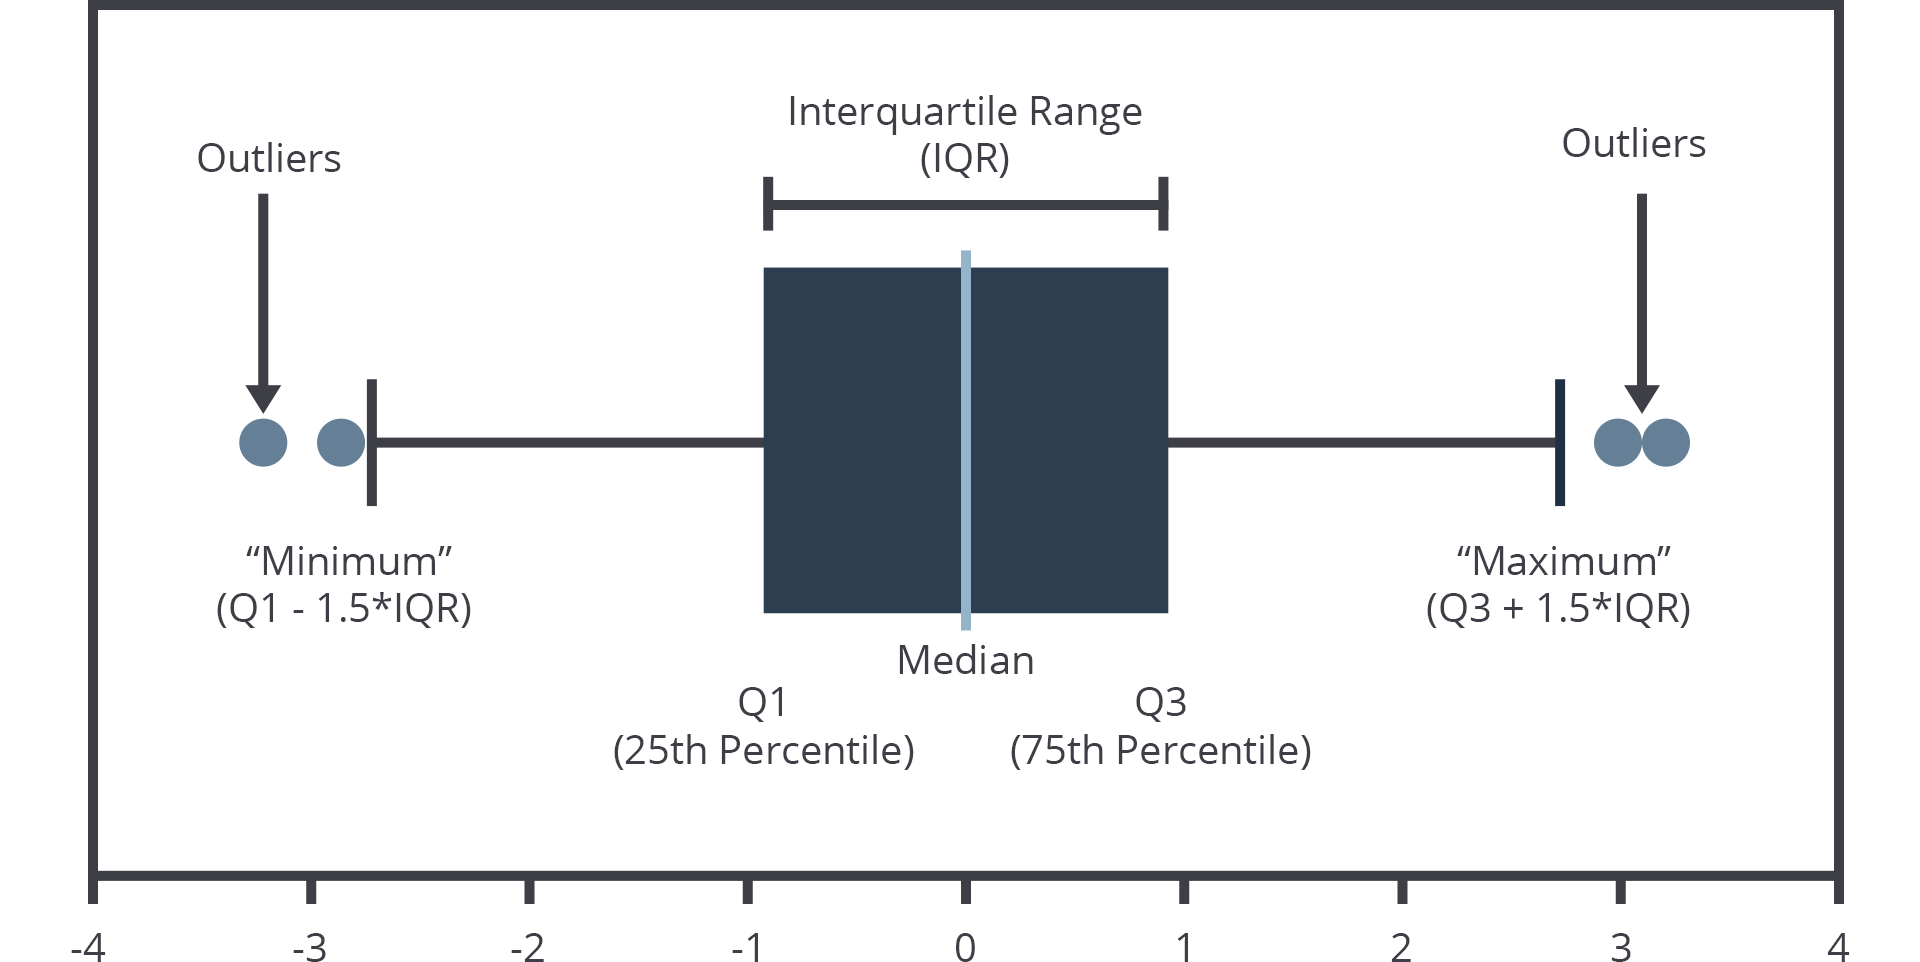


Sumber: Dicoding Academy

---



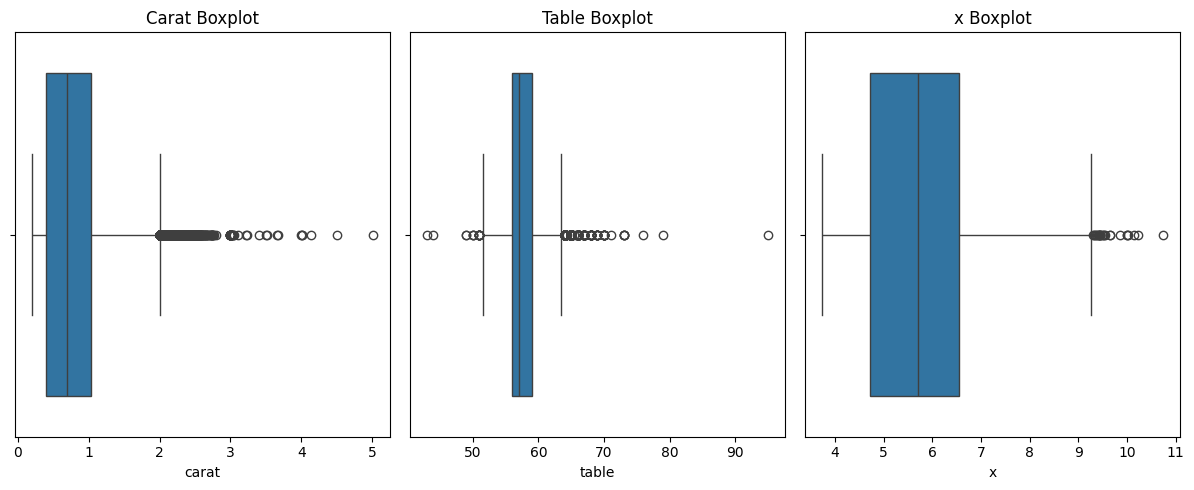

In [ ]:
# Deteksi Outliers dengan Boxplot

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

sns.boxplot(x = diamonds['carat'], ax = axes[0])
axes[0].set_title('Carat Boxplot')

sns.boxplot(x = diamonds['table'], ax = axes[1])
axes[1].set_title('Table Boxplot')

sns.boxplot(x = diamonds['x'], ax = axes[2])
axes[2].set_title('x Boxplot')


plt.tight_layout()
plt.show()

Pada Metode IQR, Outliers dapat didefinisikan sebagai:

a. Data yang nilainya 1.5 QR di atas Q3, atau

b. Data yang nilainya 1.5 QR di bawah Q1 *italicized text*

Untuk itu, perlu dihitung terlebih dahulu batas atas dan batas bawah, dan dapat dicapai dengan rumus:

- **BB = Q1 - 1.5 * IQR**
- **BB = Q3 + 1.5 * IQR**

Dimana, **IQR = Q3 - Q1**

---



In [ ]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)

IQR = Q3 - Q1

# perform IQR Outlier removal to all numeric values in "diamonds" (~ = negasi)
diamonds = diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

diamonds.shape

<ipython-input-10-fb644fa016da>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-10-fb644fa016da>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-10-fb644fa016da>:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds = diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(47524, 10)

### EDA - Univariate Analysis

---



           sample count  percentage
Ideal             20340        42.8
Premium           12115        25.5
Very Good         10994        23.1
Good               3745         7.9
Fair                330         0.7


<Axes: title={'center': 'cut'}>

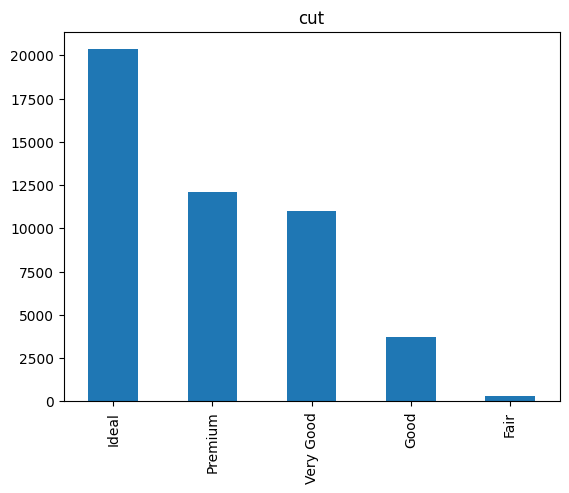

In [ ]:
# Initialize features
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

# Categorical features analysis
# Cut Feature

feature = categorical_features[0]
count = diamonds[feature].value_counts() # Outputs values and the counts of the observed feature
percent = 100 * diamonds[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

   sample count  percentage
G         10081        21.2
E          8910        18.7
F          8466        17.8
H          7176        15.1
D          6195        13.0
I          4462         9.4
J          2234         4.7


<Axes: title={'center': 'color'}>

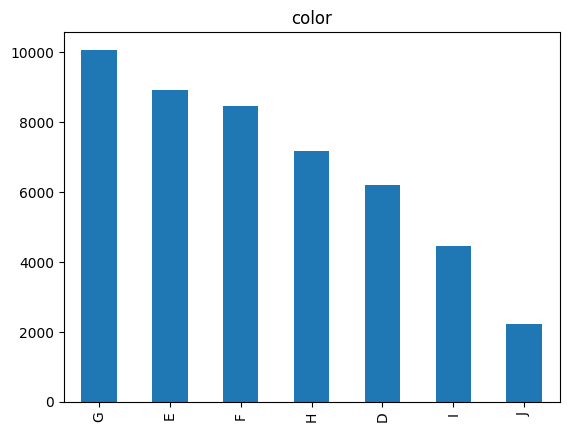

In [ ]:
# Color Feature

feature = categorical_features[1]
count = diamonds[feature].value_counts() # Outputs values and the counts of the observed feature
percent = 100 * diamonds[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

      sample count  percentage
SI1          11552        24.3
VS2          10928        23.0
SI2           7402        15.6
VS1           7373        15.5
VVS2          4683         9.9
VVS1          3463         7.3
IF            1650         3.5
I1             473         1.0


<Axes: title={'center': 'clarity'}>

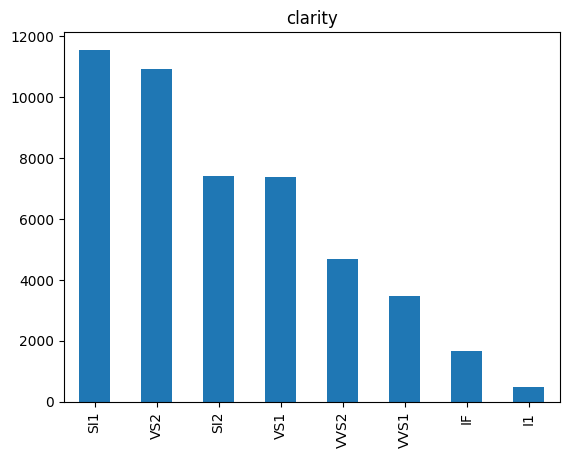

In [ ]:
# Clarity Feature

feature = categorical_features[2]
count = diamonds[feature].value_counts() # Outputs values and the counts of the observed feature
percent = 100 * diamonds[feature].value_counts(normalize = True)
df1 = pd.DataFrame({'sample count': count, 'percentage': percent.round(1)})

print(df1)
count.plot(kind = 'bar', title = feature)

- IF - Internally Flawless
- VVS2 - Very Very Slight Inclusions
- VVS1 - Very Very Slight Inclusions
- VS1 - Very Slight Inclusions
- VS2 - Very Slight Inclusions
- SI2 - Slight Inclusions
- SI1 - Slight Inclusions
- I1 - Imperfect


---



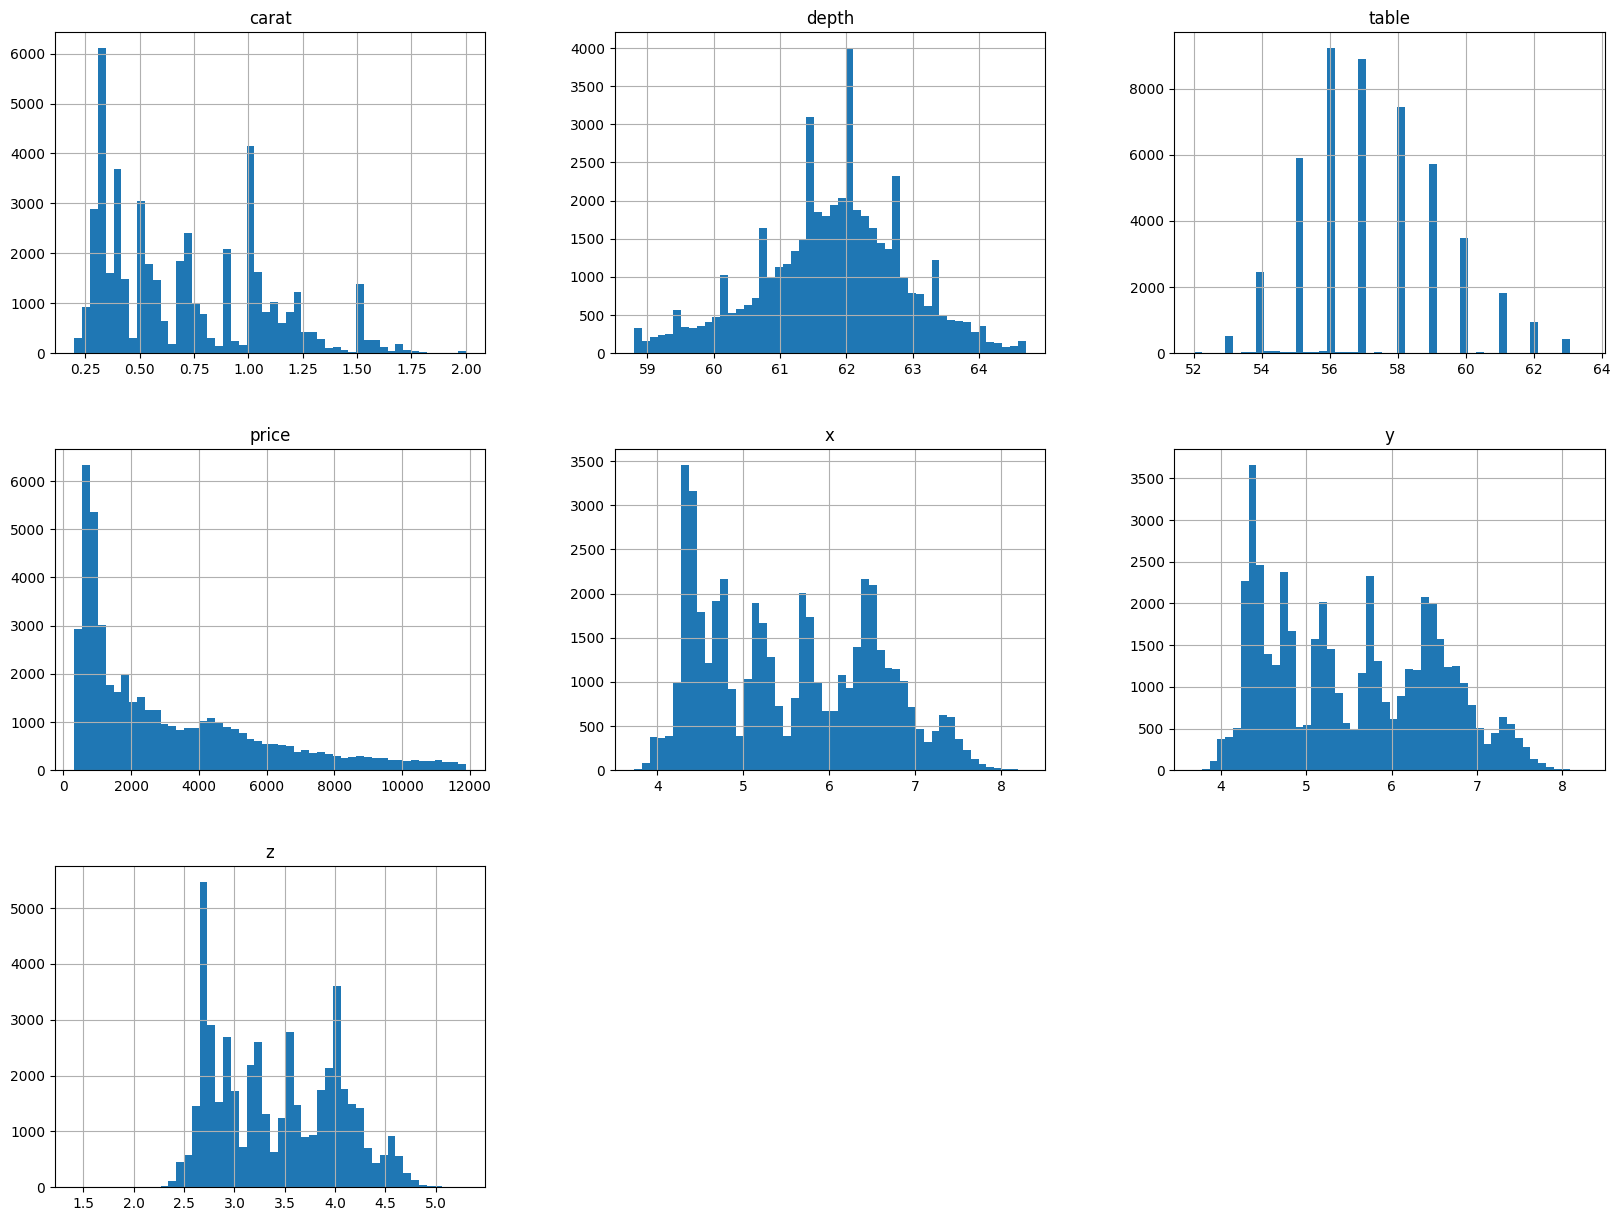

In [ ]:
# Numerical features analysis
diamonds.hist(bins = 50, figsize = (20,15))
plt.show()

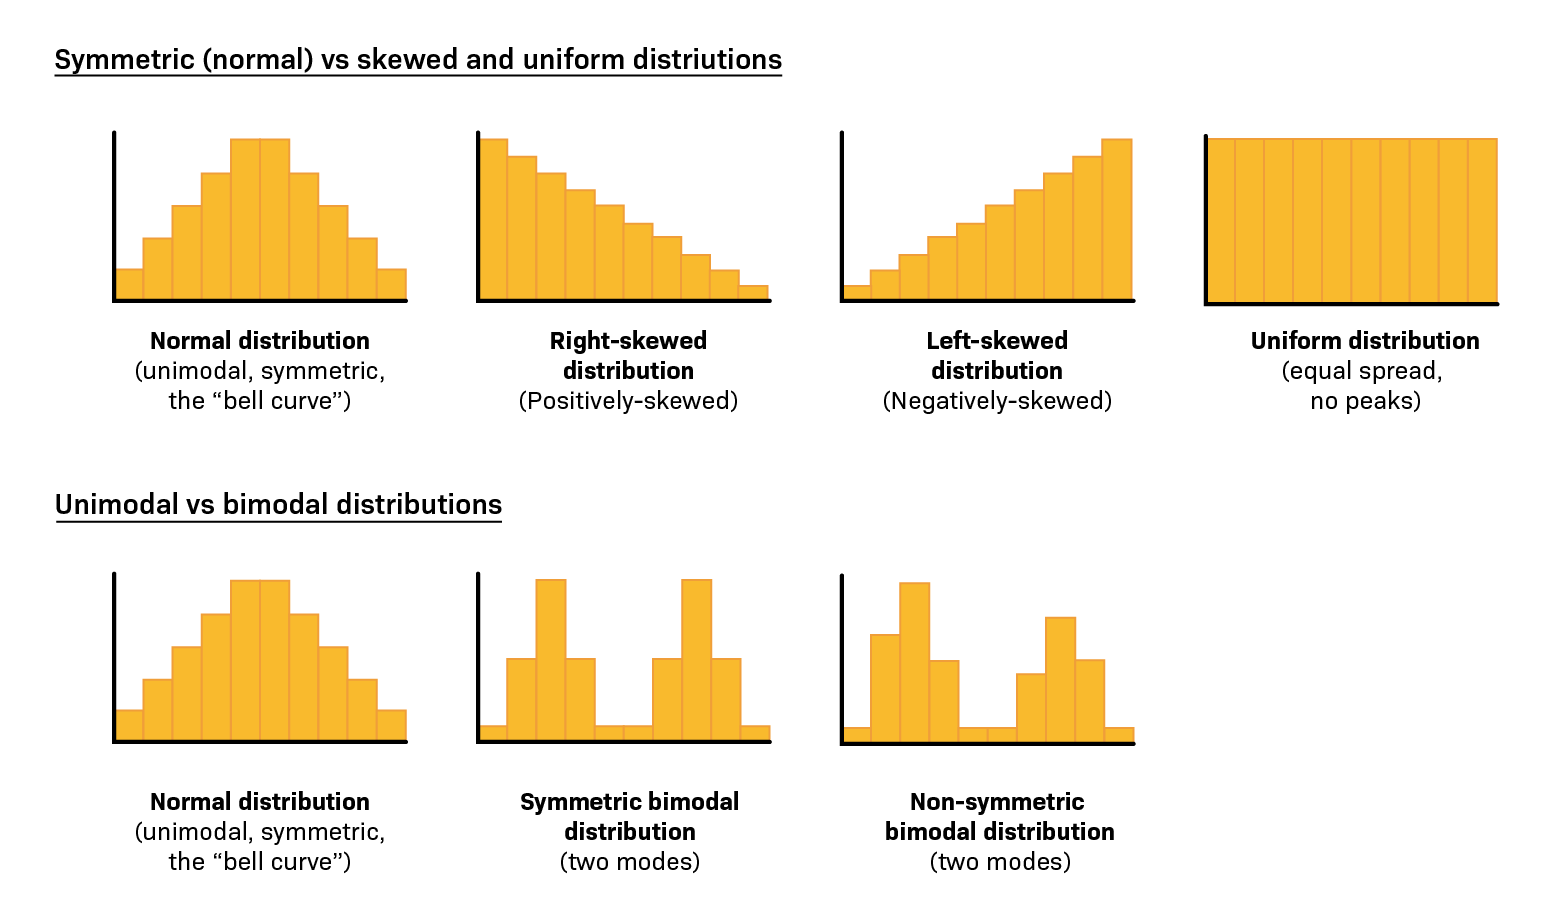


Sumber: LabXchange



### EDA - Multivariate Analysis

---



<ipython-input-15-a3bde3a93891>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'price', kind = 'bar', dodge = False, height = 4, aspect = 3,
<ipython-input-15-a3bde3a93891>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'price', kind = 'bar', dodge = False, height = 4, aspect = 3,
<ipython-input-15-a3bde3a93891>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = col, y = 'price', kind = 'bar', dodge = False, height = 4, aspect = 3,


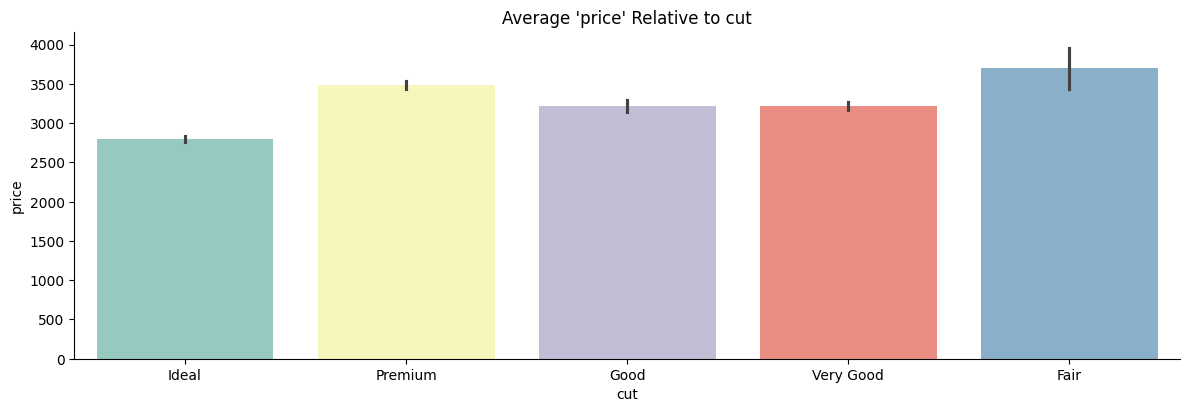

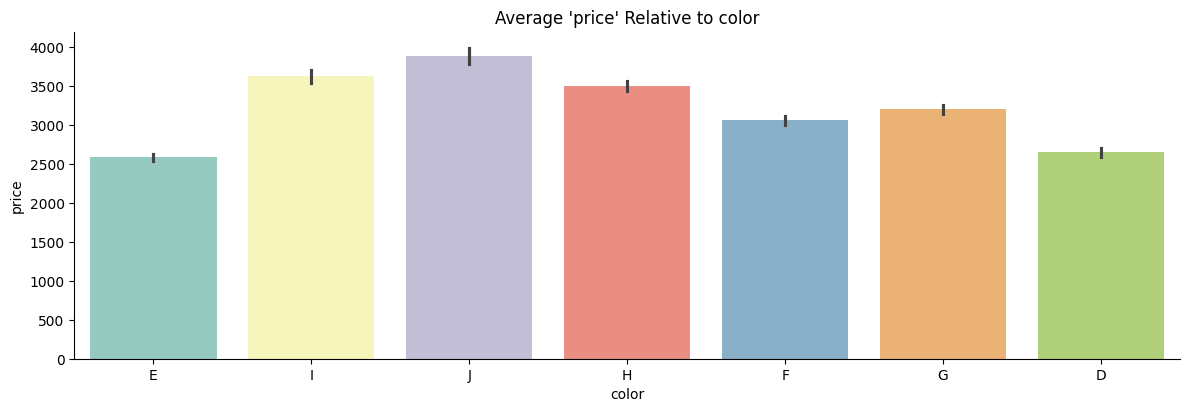

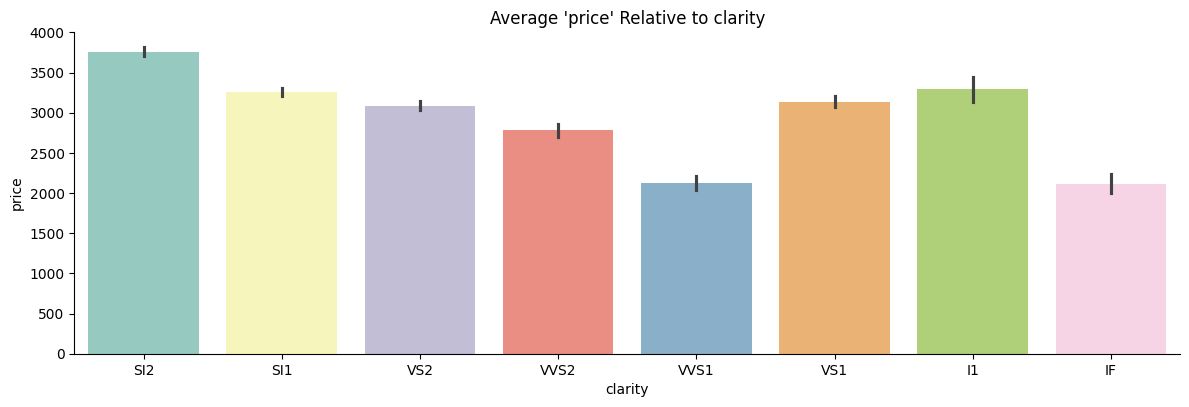

In [ ]:
# Categorical Features
cat_features = diamonds.select_dtypes(include = 'object').columns.to_list()

for col in cat_features:
  sns.catplot(x = col, y = 'price', kind = 'bar', dodge = False, height = 4, aspect = 3,
              data = diamonds, palette = 'Set3')
  plt.title("Average 'price' Relative to {}".format(col))


- Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.

- Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.

- Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.

Kesimpulannya, fitur kategori memiliki pengaruh yang rendah terhadap harga.

---



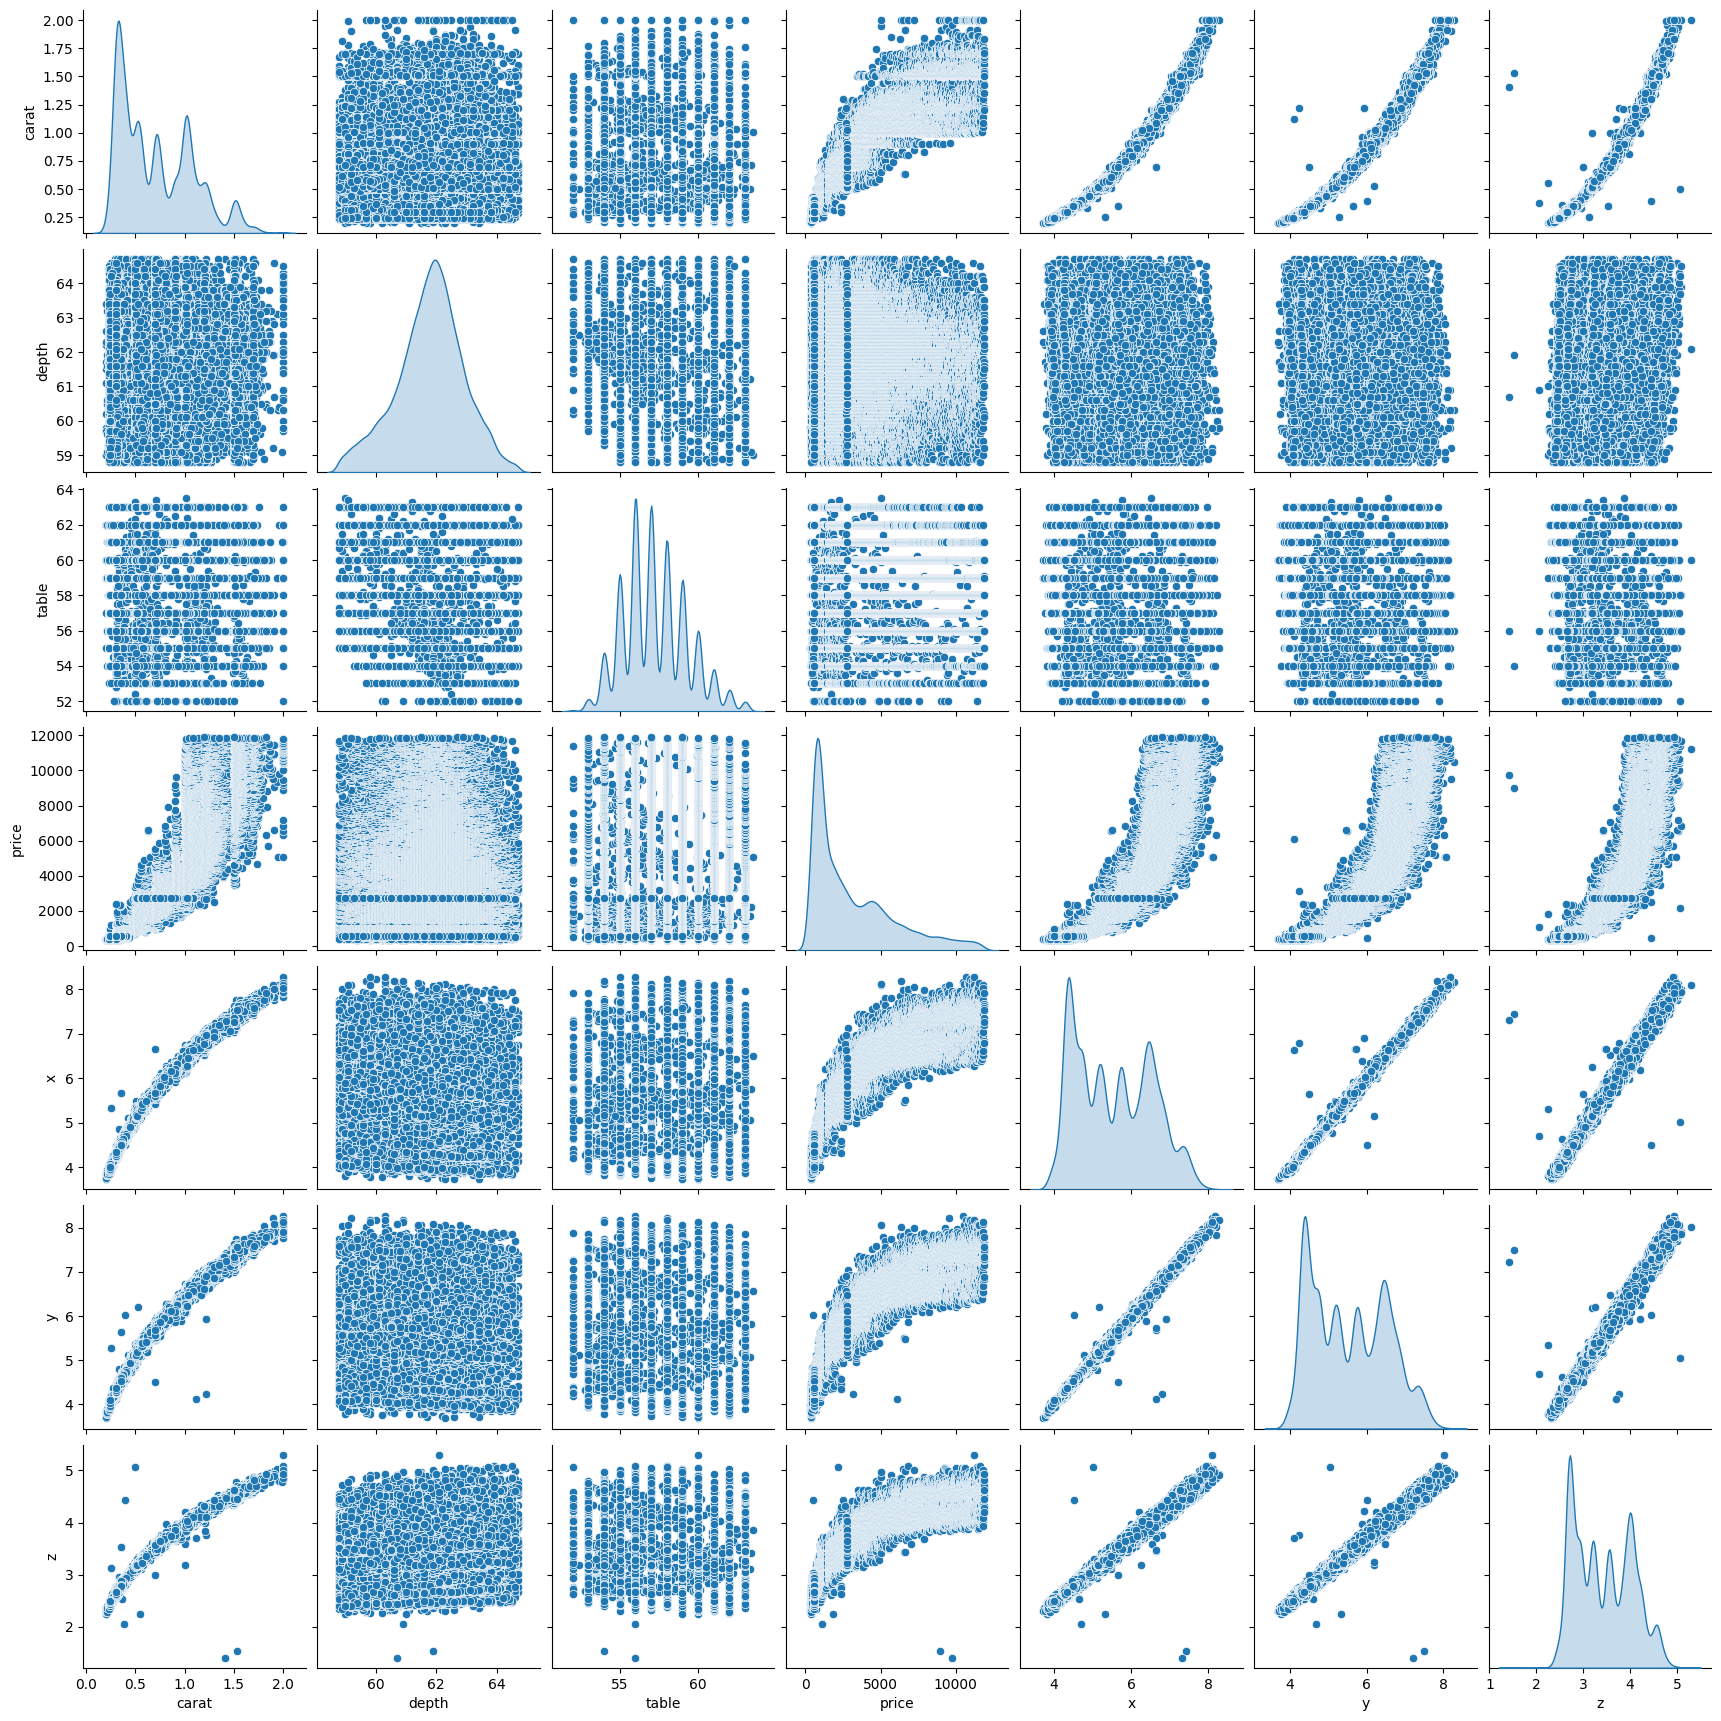

In [ ]:
# Numerical Features
sns.pairplot(diamonds, diag_kind = 'kde')

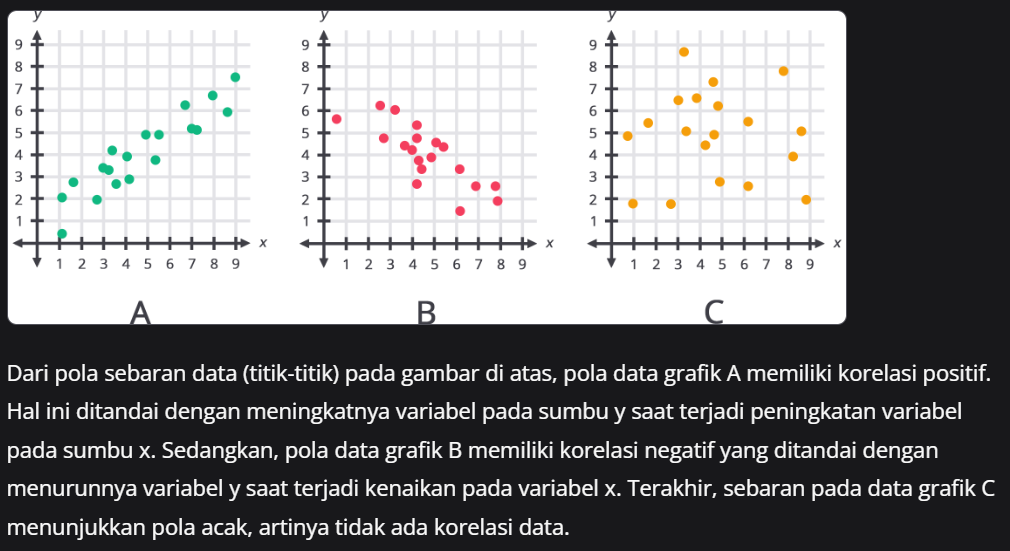

Sumber: Dicoding Academy

---



<ipython-input-17-c9953db18322>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

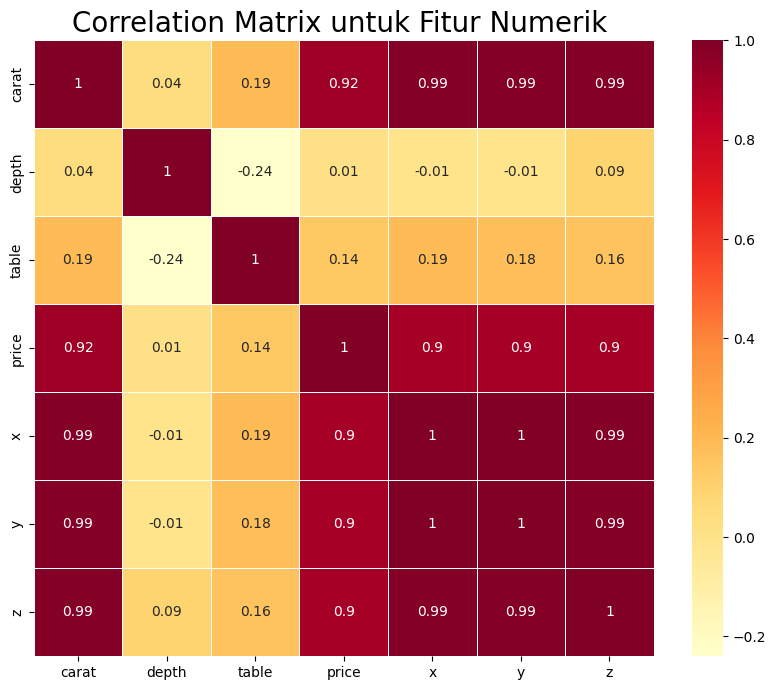

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'YlOrRd', linewidths = 0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari heatmap tersebut kita dapat menyimpulkan bahwa fitur 'carat', 'x', 'y', dan 'z' memiliki korelasi yang sangat tinggi (> 0.9) dengan fitur 'price'.

Di sisi lain, fitur 'depth' memiliki korelasi yang sangat rendah dengan keempat fitur tersebut. Maka dari itu, 'depth' dapat kita drop dari numerical features dan dataset ini.

---



In [ ]:
diamonds.drop(['depth'], inplace = True, axis = 1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


### Data Preparation

---
- Features Encoding
- Dimension Reduction with PCA
- Train Test Split
- Standardization


In [ ]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)

diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


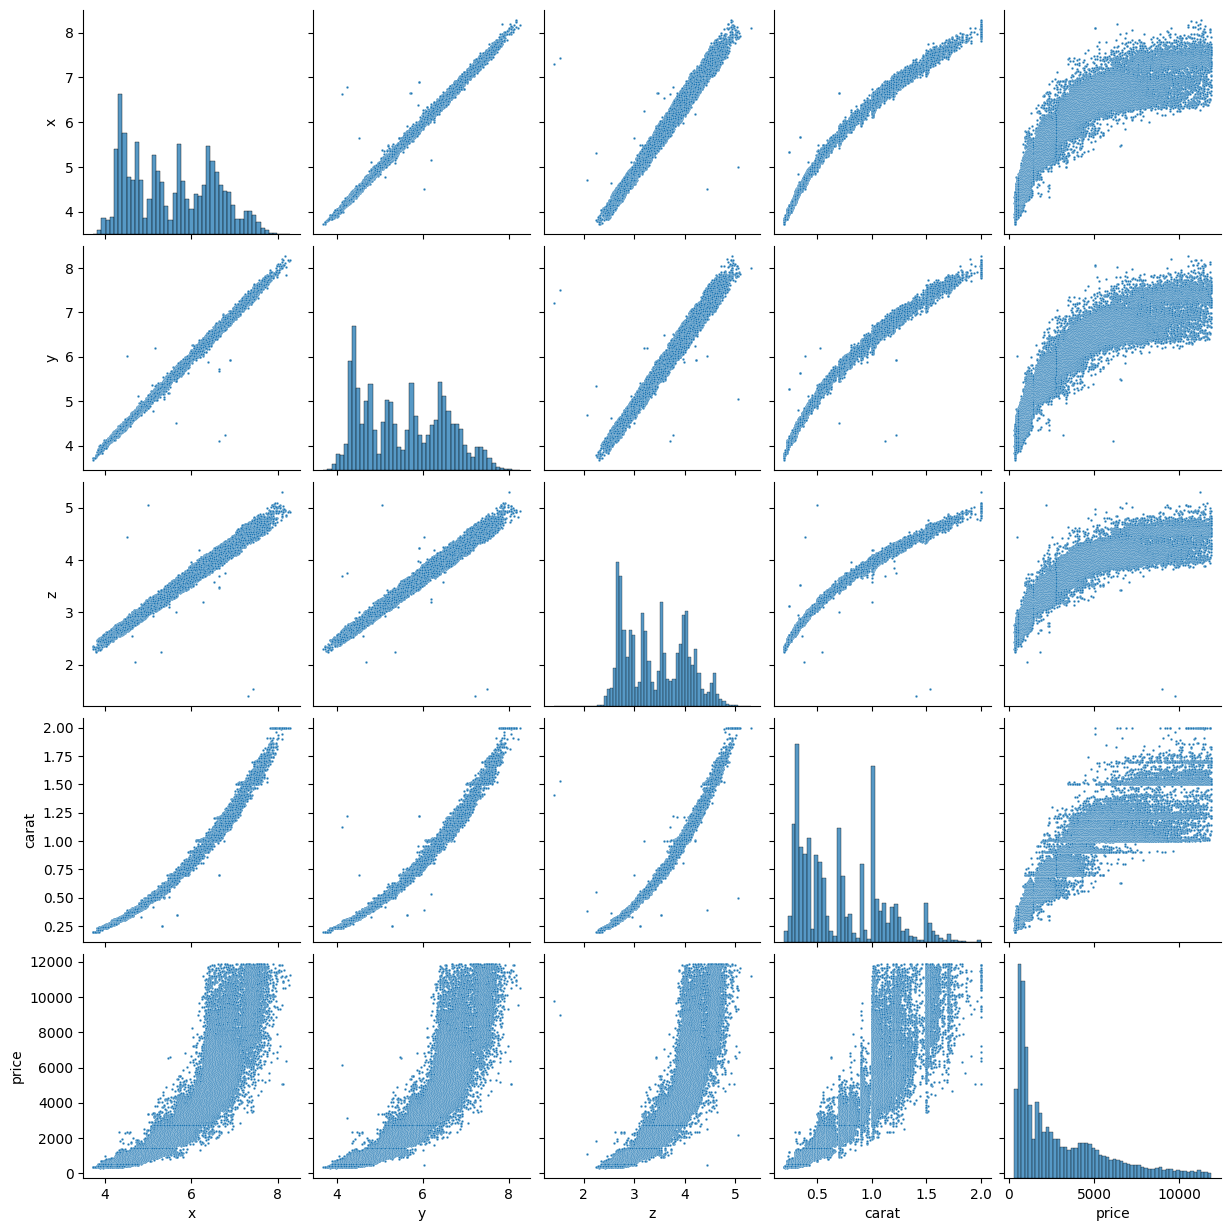

In [ ]:
sns.pairplot(diamonds[['x','y','z', 'carat', 'price']], plot_kws={"s": 3});

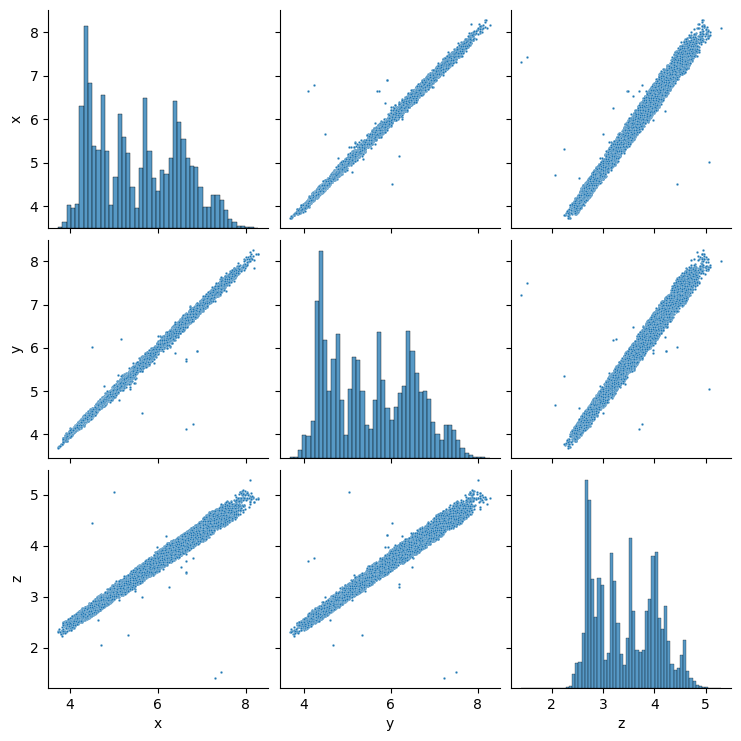

In [ ]:
# PCA Dimension Reduction
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']]) # what is this for

pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

diamonds

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.452585
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.630066
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.048530
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-1.831975
5,0.24,57.0,336,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,-2.451982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,2757,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.295534
53936,0.72,55.0,2757,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.294127
53937,0.70,60.0,2757,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0.209390
53938,0.86,58.0,2757,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.884149


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

x = diamonds.drop(["price"], axis = 1)
y = diamonds["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 123)

print(f"Total sample in dataset: {len(x)}")
print(f"Total train samples: {len(x_train)}")
print(f"Total test samples: {len(x_test)}")

Total sample in dataset: 47524
Total train samples: 42771
Total test samples: 4753


Selalu ingat bahwa porses transformasi, misalnya scaling (normalisasi/standarisasi) harus dilakukan **setelah** membagi data train dan test.

Hal ini bertujuan untuk mencegah data leakage. Scaling pada seluruh dataset membuat model memiliki informasi tentang distribusi pada data uji, dimana tujuan dari data uji adalah data yang benar-benar baru untuk model.

---



In [ ]:
x_train.head()

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
536,0.70,59.0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0.220800
21293,1.21,60.0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,2.043695
45577,0.52,56.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.556825
37379,0.40,56.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,-1.359764
38240,0.39,56.0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,-1.220236


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

numerical_values = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(x_train[numerical_values])
x_train[numerical_values] = scaler.transform(x_train.loc[:, numerical_values])
x_train[numerical_values].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


In [ ]:
x_train[numerical_values].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


### Model Development - K-Nearest Neighbor

---



In [ ]:
# Buat dataframe untuk model
models = pd.DataFrame(
    index = ['train_mse', 'test_mse'],
    columns = ['KNN', 'RandomForest', 'Boosting'])

models

,KNN,RandomForest,Boosting
train_mse,NaN,NaN,NaN
test_mse,NaN,NaN,NaN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(x_train, y_train)

knn_pred_train = knn.predict(x_train)
models.loc['train_mse','KNN'] = mean_squared_error(y_pred = knn_pred_train, y_true = y_train)

### Model Development - Random Forest

---

Random Forest = Ensemble Learning - Model yang terdiri dari beberapa model yang bekerje bersama-sama.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 50, max_depth = 16, random_state = 55, n_jobs = -1)
forest.fit(x_train, y_train)

forest_pred_train = forest.predict(x_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred = forest_pred_train, y_true = y_train)

- n_estimator: jumlah trees (pohon) di forest.

- max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.

- random_state: digunakan untuk mengontrol random number generator yang digunakan.

- n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.

### Model Development - Boosting Algorithm

---

Random Forest di atas mengimplementasikan Bagging Algorithm.

- Bagging = setiap model dilatih secara paralel.
- Boosting = model dilatih secara berurutan dalam proses yang iteratif.

Boosting models bekerja dengan membangun model dari data latih, dan membuat model kedua yang bertugas memperbaiki kesalahan dari model pertamaa. Hal ini diulang sampai data latih dapat diprediksi dengan baik atau mencapai jumlah maksimum untuk ditambahkan.

In [ ]:
# AdaBoost Boosting Algorithm
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate = 0.05, random_state = 55)
boosting.fit(x_train, y_train)

boost_pred_train = boosting.predict(x_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred = boost_pred_train, y_true = y_train)

- learning_rate: bobot yang diterapkan pada setiap regressor di masing-masing proses iterasi boosting.

- random_state: digunakan untuk mengontrol random number generator yang digunakan.

In [ ]:
models

,KNN,RandomForest,Boosting
train_mse,203766.078199,52287.365706,904838.012908
test_mse,NaN,NaN,NaN


### Evaluasi Model

---

In [ ]:
# Scaling on test data
x_test.loc[:, numerical_values] = scaler.transform(x_test[numerical_values])

x_test

,carat,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
35096,-1.104369,-1.613671,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,-1.243844
17479,2.157014,2.350749,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.760714
14717,-1.104369,-0.622566,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,-1.264081
1179,0.000728,-0.127013,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.174562
11527,0.971057,-0.176569,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1.088310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42049,-0.807879,-0.127013,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,-0.774720
43268,-1.104369,2.350749,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,-1.246797
8032,0.782382,2.350749,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.798463
36927,-0.807879,0.368539,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-0.794478


In [ ]:
# Buat dataframe yang isinya nilai MSE data train dan test
mse = pd.DataFrame(columns = ['train', 'test'], index = ['KNN', 'RF', 'Boosting'])

# Dictionary models/algoritma
model_dict = {'KNN': knn, 'RF': forest, 'Boosting': boosting}

# Hitung MSE masing-masing model pada data train dan test
for name, model in model_dict.items():
  mse.loc[name, 'train'] = mean_squared_error(y_true = y_train, y_pred = model.predict(x_train))/1e3
  mse.loc[name, 'test'] = mean_squared_error(y_true = y_test, y_pred = model.predict(x_test))/1e3

mse

,train,test
KNN,203.766078,239.529923
RF,52.287366,130.788418
Boosting,904.838013,846.212966


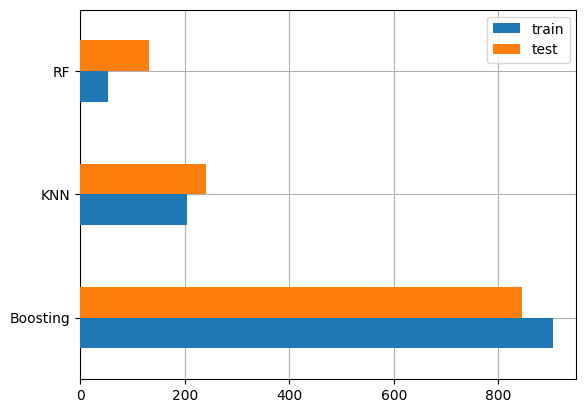

In [ ]:
# Visualisasi hasil MSE
fig, ax = plt.subplots()
mse.sort_values(by = 'test', ascending = False).plot(kind = 'barh', ax = ax, zorder = 3)
ax.grid(zorder = 0)

Dari hasil evaluasi di atas, dapat dilihat bahwa Random Forest memiliki nilai error paling kecil, dan Boosting memiliki nilai error paling besar.

Model yang akan kita pilih untuk prediksi harga diamonds adalah Random Forest.

---



In [ ]:
# Prediction
prediksi = x_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
35096,886,923.2,884.2,788.1


Sesuai dengan kesimpulan, hasil prediksi Random Forest terdekat dengan nilai aslinya.

---

